### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

In [2]:
df = pd.read_csv('Automobile_data.csv', engine='python')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Data Preprocessing

Find which features are objects and convert them to string formula for LabelEncoder and Fill NaN

In [4]:
df = df.replace('?', np.nan)

In [5]:
cat_index = []
for i in range(df.shape[1]):
    if df.iloc[:,i].dtype == object:
        cat_index.append(i)
print(cat_index)

[1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 17, 18, 19, 21, 22, 25]


In [6]:
df.iloc[:,cat_index].dtypes

normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
engine-type          object
num-of-cylinders     object
fuel-system          object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
price                object
dtype: object

Let select the index of the categories features without the target (index - 25)

In [7]:
cat_index = cat_index[:-1]

Converting to String Formula:

In [8]:
for i in cat_index:
    df.iloc[:,i] = df.iloc[:,i].astype('str')

Data engineering with LableEncoder:

In [9]:
for i in cat_index:
    encode = LabelEncoder()
    df[df.iloc[:,i].name] = encode.fit_transform(df[df.iloc[:,i].name])

Select features with missing values, drop features that more than quarter of the sample space, and fill the features with mode.

In [10]:
col_miss_val = []   
for i in range(df.shape[1]):
    if df.isna().sum()[i] != 0:
        col_miss_val.append(df.columns.to_list()[i])
    else:
        continue  

for i in col_miss_val:        
    if df[i].isna().sum() > int(df.shape[0]/4):
        df.drop(i,axis=1,inplace=True)
    else:
        continue
        
Frequent = []
for i in col_miss_val:
    Frequent.append(df[i].mode())

for i, k in zip(col_miss_val, range(len(col_miss_val))):
    df[i] = df[i].fillna(Frequent[k])
    
df = df.dropna()

In [11]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Scale the data for better observation about the conncetion of the features with the target 

In [12]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:,:-1].values)
df = pd.DataFrame(data=np.concatenate((df_scaled, df.iloc[:,-1].values.reshape((-1,1))), axis=1), columns=df.columns.to_list())

In [13]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,1,0,1,0,1,0,1,0,0.058309,...,0.260377,0.714286,0.605263,0.111111,0.125,0.0847458,0.434783,0.222222,0.289474,13495
1,1,1,0,1,0,1,0,1,0,0.058309,...,0.260377,0.714286,0.605263,0.111111,0.125,0.0847458,0.434783,0.222222,0.289474,16500
2,0.6,1,0,1,0,1,0.5,1,0,0.230321,...,0.343396,0.714286,0.0263158,0.75,0.125,0.338983,0.434783,0.166667,0.263158,16500
3,0.8,0.529412,0.047619,1,0,0,0.75,0.5,0,0.38484,...,0.181132,0.714286,0.342105,0.666667,0.1875,0.0338983,0.695652,0.305556,0.368421,13950
4,0.8,0.529412,0.047619,1,0,0,0.75,0,0,0.373178,...,0.283019,0.714286,0.342105,0.666667,0.0625,0.135593,0.695652,0.138889,0.157895,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.2,0.960784,1,1,0,0,0.75,1,0,0.655977,...,0.301887,0.714286,0.921053,0.416667,0.15625,0.118644,0.652174,0.277778,0.315789,16845
198,0.2,0.960784,1,1,1,0,0.75,1,0,0.655977,...,0.301887,0.714286,0.921053,0.416667,0.10625,0.389831,0.608696,0.166667,0.236842,19045
199,0.2,0.960784,1,1,0,0,0.75,1,0,0.655977,...,0.422642,0.714286,0.684211,0.194444,0.1125,0.220339,0.695652,0.138889,0.184211,21485
200,0.2,0.960784,1,0,1,0,0.75,1,0,0.655977,...,0.316981,0.428571,0.157895,0.666667,1,0.0508475,0.347826,0.361111,0.289474,22470


### Feature Selection

Split the data to training and validation sets

In [14]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
class Mutual_result(object):
        
    def __init__(self, X, y, n_folds, max_eval):
        """
        Parameters
        ----------
        X: array-like {n_samples, n_features}
            Training instances to compute the feature importance scores from
        y: array-like {n_samples}
            Training labels
        -------
        """    
        self.X = X
        self.y = y
        
                          
    def fit(X, y): 
        
        scores_Mutual = []           
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)        
        X_train = pd.DataFrame(data=X_train, columns=X.columns)        
        scores = mutual_info_regression(np.array(X_train), np.array(y_train))                  
        for i in range(X_train.shape[1]):
            scores_Mutual.append((scores[i], X_train.columns[i]))
            df_Mutual = pd.DataFrame(data=scores_Mutual, columns=('score', 'feature'))  
            blankIndex=[''] * len(df_Mutual)
            df_Mutual.index = blankIndex
            df_Mutual = df_Mutual.sort_values(by='score', ascending=False)
            
        return df_Mutual

In [16]:
df_Mutual = Mutual_result.fit(X,y)

Features Scores:

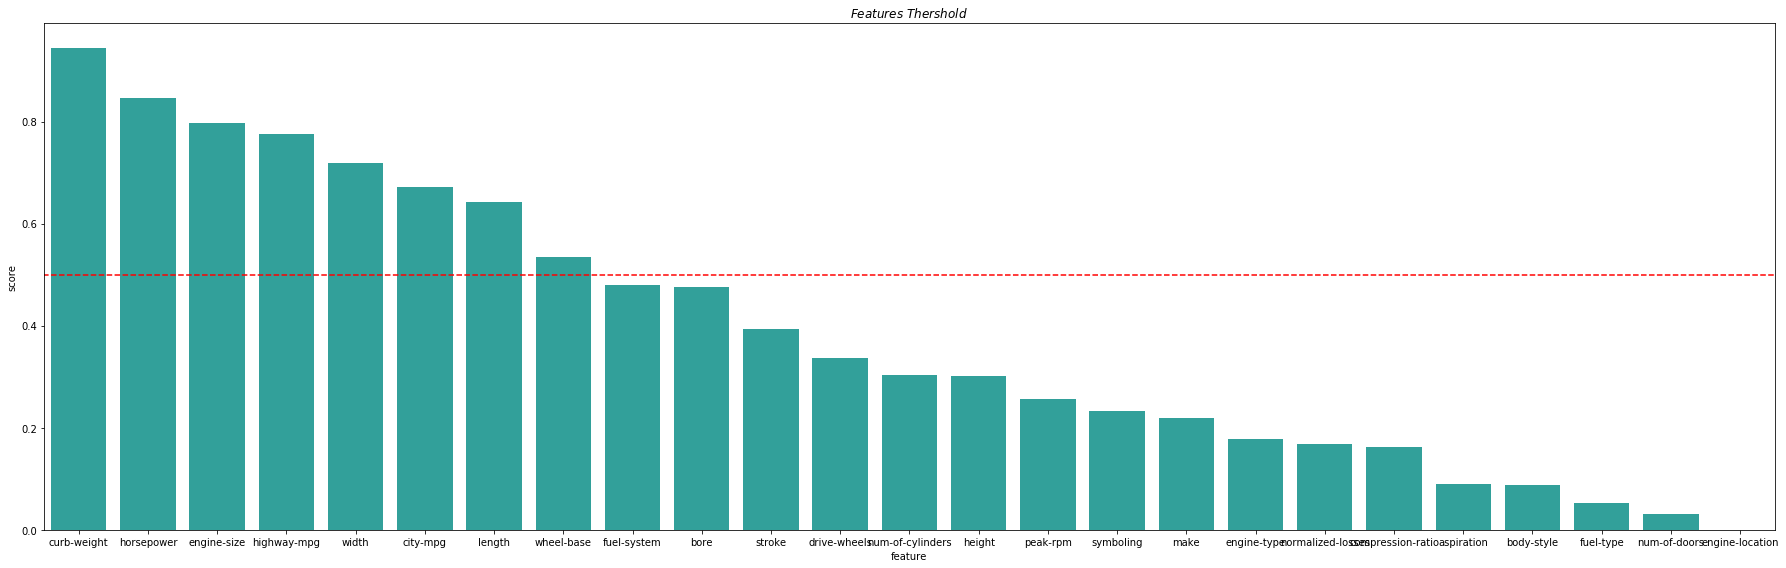

In [17]:
plt.figure(figsize=(25,8))
plt.hlines(y=0.5, xmin=-5, xmax=25, linestyle='--', color='r')
plt.title('$Features\ Thershold$')
g = sns.barplot(x='feature', y='score', data=df_Mutual, color="LightSeaGreen")
plt.tight_layout()
plt.show()

### Create The model

In [18]:
selected_feautres = df_Mutual[['feature']][df_Mutual['score'] > 0.5]['feature']

In [19]:
X_train, X_test = X_train.loc[:,selected_feautres], X_test.loc[:, selected_feautres]

In [25]:
X_train, X_test = X_train.values.astype(np.float32), X_test.values.astype(np.float32)
y_train, y_test = y_train.values.astype(np.float32).reshape(-1,1), y_test.values.astype(np.float32).reshape(-1,1)

### Model Selection

"We wish to select, from among the candidate models, the model that minimizes the information loss. We cannot choose with certainty, but we can minimize the estimated information loss."

In [26]:
import torch

In [27]:
dtype = torch.float

In [28]:
X_train_tensor = torch.tensor(X_train, dtype=dtype)
X_test_tensor = torch.tensor(X_test, dtype=dtype)

y_train_tensor = torch.tensor(y_train, dtype=dtype)
y_test_tensor = torch.tensor(y_test, dtype=dtype)

In [33]:
inp = 8
out = 1
loss_fn = torch.nn.MSELoss()
lr = 0.0001

In [34]:
from sklearn.metrics import mean_squared_error
from math import log

aic = []

# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

for hid in np.arange(100,200,20):   
    model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                                torch.nn.Sigmoid(),
                                torch.nn.Linear(hid, out))
    
    for iter in range(10000):  
        y_pred = model(X_train_tensor)
        loss = loss_fn(y_pred, y_train_tensor)
        
        if iter % 1000 == 0:
            print(f'Model with {hid} of parameters, {iter} iteration with {loss} loss') 
            
        
        model.zero_grad()
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
    
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.detach().numpy()
    mse = mean_squared_error(y_test, y_pred)
    aic.append(calculate_aic(len(y_pred), mse, hid))

Model with 100 of parameters, 0 iteration with 236062352.0 loss
Model with 100 of parameters, 1000 iteration with 16854464.0 loss
Model with 100 of parameters, 2000 iteration with 8649231.0 loss
Model with 100 of parameters, 3000 iteration with 6382819.5 loss
Model with 100 of parameters, 4000 iteration with 5106641.5 loss
Model with 100 of parameters, 5000 iteration with 4475964.5 loss
Model with 100 of parameters, 6000 iteration with 3957386.75 loss
Model with 100 of parameters, 7000 iteration with 3673796.25 loss
Model with 100 of parameters, 8000 iteration with 3492030.25 loss
Model with 100 of parameters, 9000 iteration with 3348736.75 loss
Model with 120 of parameters, 0 iteration with 236082480.0 loss
Model with 120 of parameters, 1000 iteration with 15959039.0 loss
Model with 120 of parameters, 2000 iteration with 8184969.0 loss
Model with 120 of parameters, 3000 iteration with 5868814.0 loss
Model with 120 of parameters, 4000 iteration with 4860888.5 loss
Model with 120 of par

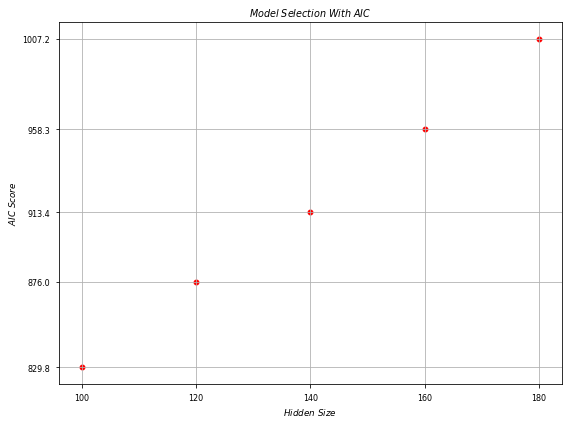

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
hidden = []
for hid in np.arange(100,200,20):   
    hidden.append(hid)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('$Model\ Selection\ With\ AIC$')
plt.scatter(hidden, aic, c='red')
plt.style.use('seaborn-paper')
plt.xlabel('$Hidden\ Size$')
plt.ylabel('$AIC\ Score$')
plt.xticks(hidden)
plt.yticks(aic)
plt.tight_layout()
plt.show()

We will train the model with 100 hidden size parametres:

In [36]:
inp = X_train_tensor.shape[1]
out = y_train_tensor.shape[1]
hid = 100
loss_fn = torch.nn.MSELoss()
lr = 0.0001

model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out))

for iter in range(10000):  
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
            
y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

0 236058560.0
1000 16048446.0
2000 8425548.0
3000 6297697.0
4000 5116332.0
5000 4469681.0
6000 4068180.5
7000 3753253.5
8000 3553235.0
9000 3388932.5


Lets plot the residual and the predicted values vs. true values:

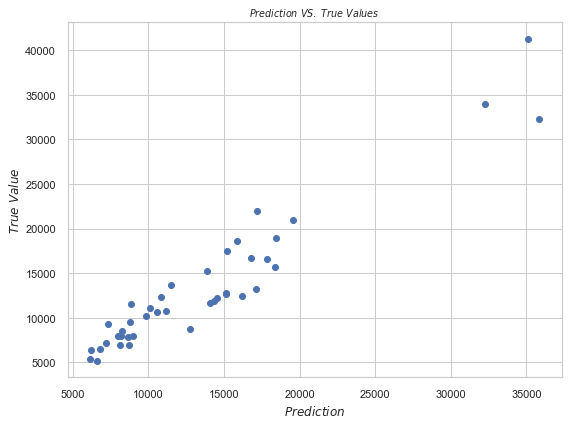

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_test)
plt.style.use('seaborn-paper')
plt.title('$Prediction\ VS.\ True\ Values$')
plt.xlabel('$Prediction$')
plt.ylabel('$True\ Value$')
plt.tight_layout()
plt.show()

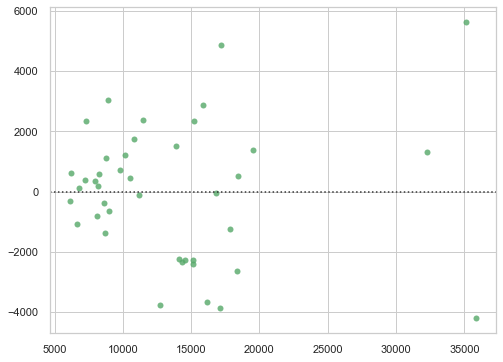

In [49]:
import seaborn as sns
plt.figure(figsize=(8,6))
# Finalize and render the figure
sns.set(style="whitegrid") 
# Plot the residuals after fitting a linear model
sns.residplot(y_pred, y_test, lowess=False, color="g")

In [42]:
torch.save(model,'regression-1')

In [43]:
model_1 = torch.load('regression-1')
y_pred_tensor = model_1(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

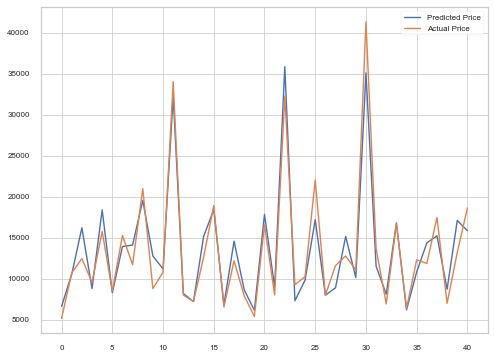

In [50]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-paper')
plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test, label='Actual Price')
plt.legend()
plt.show()